<a href="https://colab.research.google.com/github/brunorreiss/analise_imoveis/blob/main/Analise_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:** Bruno Eduardo Rodrigues dos Reis

Objetivo do Projeto:
O projeto visa realizar uma análise exploratória dos dados (EDA) de um conjunto de dados de imóveis para locação, abrangendo várias cidades. O objetivo é identificar padrões, tendências e relações nas características dos imóveis e nos valores de aluguel, fornecendo insights sobre o mercado imobiliário.

Descrição dos Dados:
- O conjunto de dados inclui informações sobre imóveis disponíveis para locação, tais como área, número de quartos, banheiros, vagas de estacionamento, presença de mobília, valores associados (condomínio, aluguel, IPTU, seguro contra incêndio) e a cidade onde o imóvel está localizado.

Metodologia:
- Entendimento do Problema: Definição do objetivo da análise.
- Exploração dos Dados: Análise estatística descritiva para entender as características dos dados.
- Preparação dos Dados: Tratamento de outliers e conversão de tipos de dados para facilitar a análise.

Análise Exploratória de Dados (EDA):
- Análise de correlação entre as variáveis.
Análise comparativa entre cidades.
- Modelagem Preditora: Construção de um modelo de regressão linear para prever o valor do aluguel com base em características do imóvel.
- Análise de Clustering: Agrupamento de imóveis com características semelhantes (não concluído devido a limitações técnicas).
Resultados e Conclusões
- Correlações: Foram identificadas correlações significativas entre o valor do aluguel e características como área, número de quartos e banheiros, e vagas de estacionamento.
- Variações entre Cidades: Diferenças nas características médias dos imóveis e nos valores de aluguel entre as cidades foram observadas, refletindo a diversidade do mercado imobiliário.
- Modelagem Preditora: O modelo de regressão linear apresentou um excelente ajuste, com um coeficiente R² de 0.985, indicando que as variáveis selecionadas explicam bem o valor do aluguel.
Recomendações

Para análises futuras, recomenda-se explorar modelos preditivos mais complexos, a inclusão de dados temporais para análise de tendências e uma análise de clustering mais aprofundada para identificar segmentos específicos do mercado.

In [ ]:
# importando libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Lendo arquivo
imoveis = pd.read_csv('houses_to_rent_v2.csv')

In [ ]:
# Exibindo as primeiras linhas do arquivo
imoveis.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),area_log,hoa (R$)_log,rent amount (R$)_log,property tax (R$)_log,total (R$)_log,cluster
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,4.262680,7.633370,8.101981,5.356586,8.633909,4
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,5.771441,7.090910,8.509363,7.467942,8.983942,3
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,4.394449,6.908755,7.937732,0.000000,8.253748,1
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,3.951244,5.602119,7.014814,3.135494,7.259820,4
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,3.258097,0.000000,6.685861,3.258097,6.729824,1


In [ ]:
# Verificando dados faltantes
dados_faltantes = imoveis.isnull().sum()

In [ ]:
# Contar colunas numéricas e catgóricas
colums_numericas = imoveis.select_dtypes(include=['int64, float64']).columns
columns_categoricas = imoveis.select_dtypes(include=['object']).columns

In [ ]:
# Estatísticas descritivas
estats_descritivas = imoveis.describe()

In [ ]:
# Calcular assimetria e moda (para colunas numéricas)
skewness = imoveis.skew()
mode = imoveis.mode().iloc[0]

<ipython-input-48-a4317ca8d47e>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = imoveis.skew()


In [ ]:
# Verificar o tipo do dado da coluna 'floor' para entender seu tratamento
floor_data_type = imoveis['floor'].dtype

resumo_dados_faltantes = dados_faltantes[dados_faltantes > 0]
num_colunas_numericas = len(colums_numericas)
num_colunas_categoricas = len(columns_categoricas)

{
    "resumo_dados_faltantes": resumo_dados_faltantes,
    "num_colunas_numericas": num_colunas_numericas,
    "num_colunas_categoricas": num_colunas_categoricas,
    "estatisticas_descritivas": estats_descritivas,
    "assimetria": skewness,
    "moda": mode,
    "tipo_dado_coluna_andar": str(floor_data_type)
}

{'resumo_dados_faltantes': Series([], dtype: int64),
 'num_colunas_numericas': 0,
 'num_colunas_categoricas': 4,
 'estatisticas_descritivas':                area         rooms      bathroom  parking spaces      hoa (R$)  \
 count  10692.000000  10692.000000  10692.000000    10692.000000  1.069200e+04   
 mean     149.217920      2.506079      2.236813        1.609147  1.174022e+03   
 std      537.016942      1.171266      1.407198        1.589521  1.559231e+04   
 min       11.000000      1.000000      1.000000        0.000000  0.000000e+00   
 25%       56.000000      2.000000      1.000000        0.000000  1.700000e+02   
 50%       90.000000      2.000000      2.000000        1.000000  5.600000e+02   
 75%      182.000000      3.000000      3.000000        2.000000  1.237500e+03   
 max    46335.000000     13.000000     10.000000       12.000000  1.117000e+06   
 
        rent amount (R$)  property tax (R$)  fire insurance (R$)    total (R$)  
 count      10692.000000       10692.0

In [ ]:
def detect_outliers_iqr(data, feature):
    Q1 = imoveis[feature].quantile(0.25)
    Q3 = imoveis[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = imoveis[(imoveis[feature] < lower_bound) | (imoveis[feature] > upper_bound)]
    return outliers

In [ ]:
# Colunas para análise de outliers
columns_to_check = ['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'total (R$)']

In [ ]:
# Identificação de outliers
outliers_summary = {}
for column in columns_to_check:
    outliers_summary[column] = len(detect_outliers_iqr(imoveis, column))

outliers_summary

{'area': 672,
 'hoa (R$)': 717,
 'rent amount (R$)': 715,
 'property tax (R$)': 1081,
 'total (R$)': 706}

In [ ]:
# Configuração para visualização
sns.set(style="whitegrid")

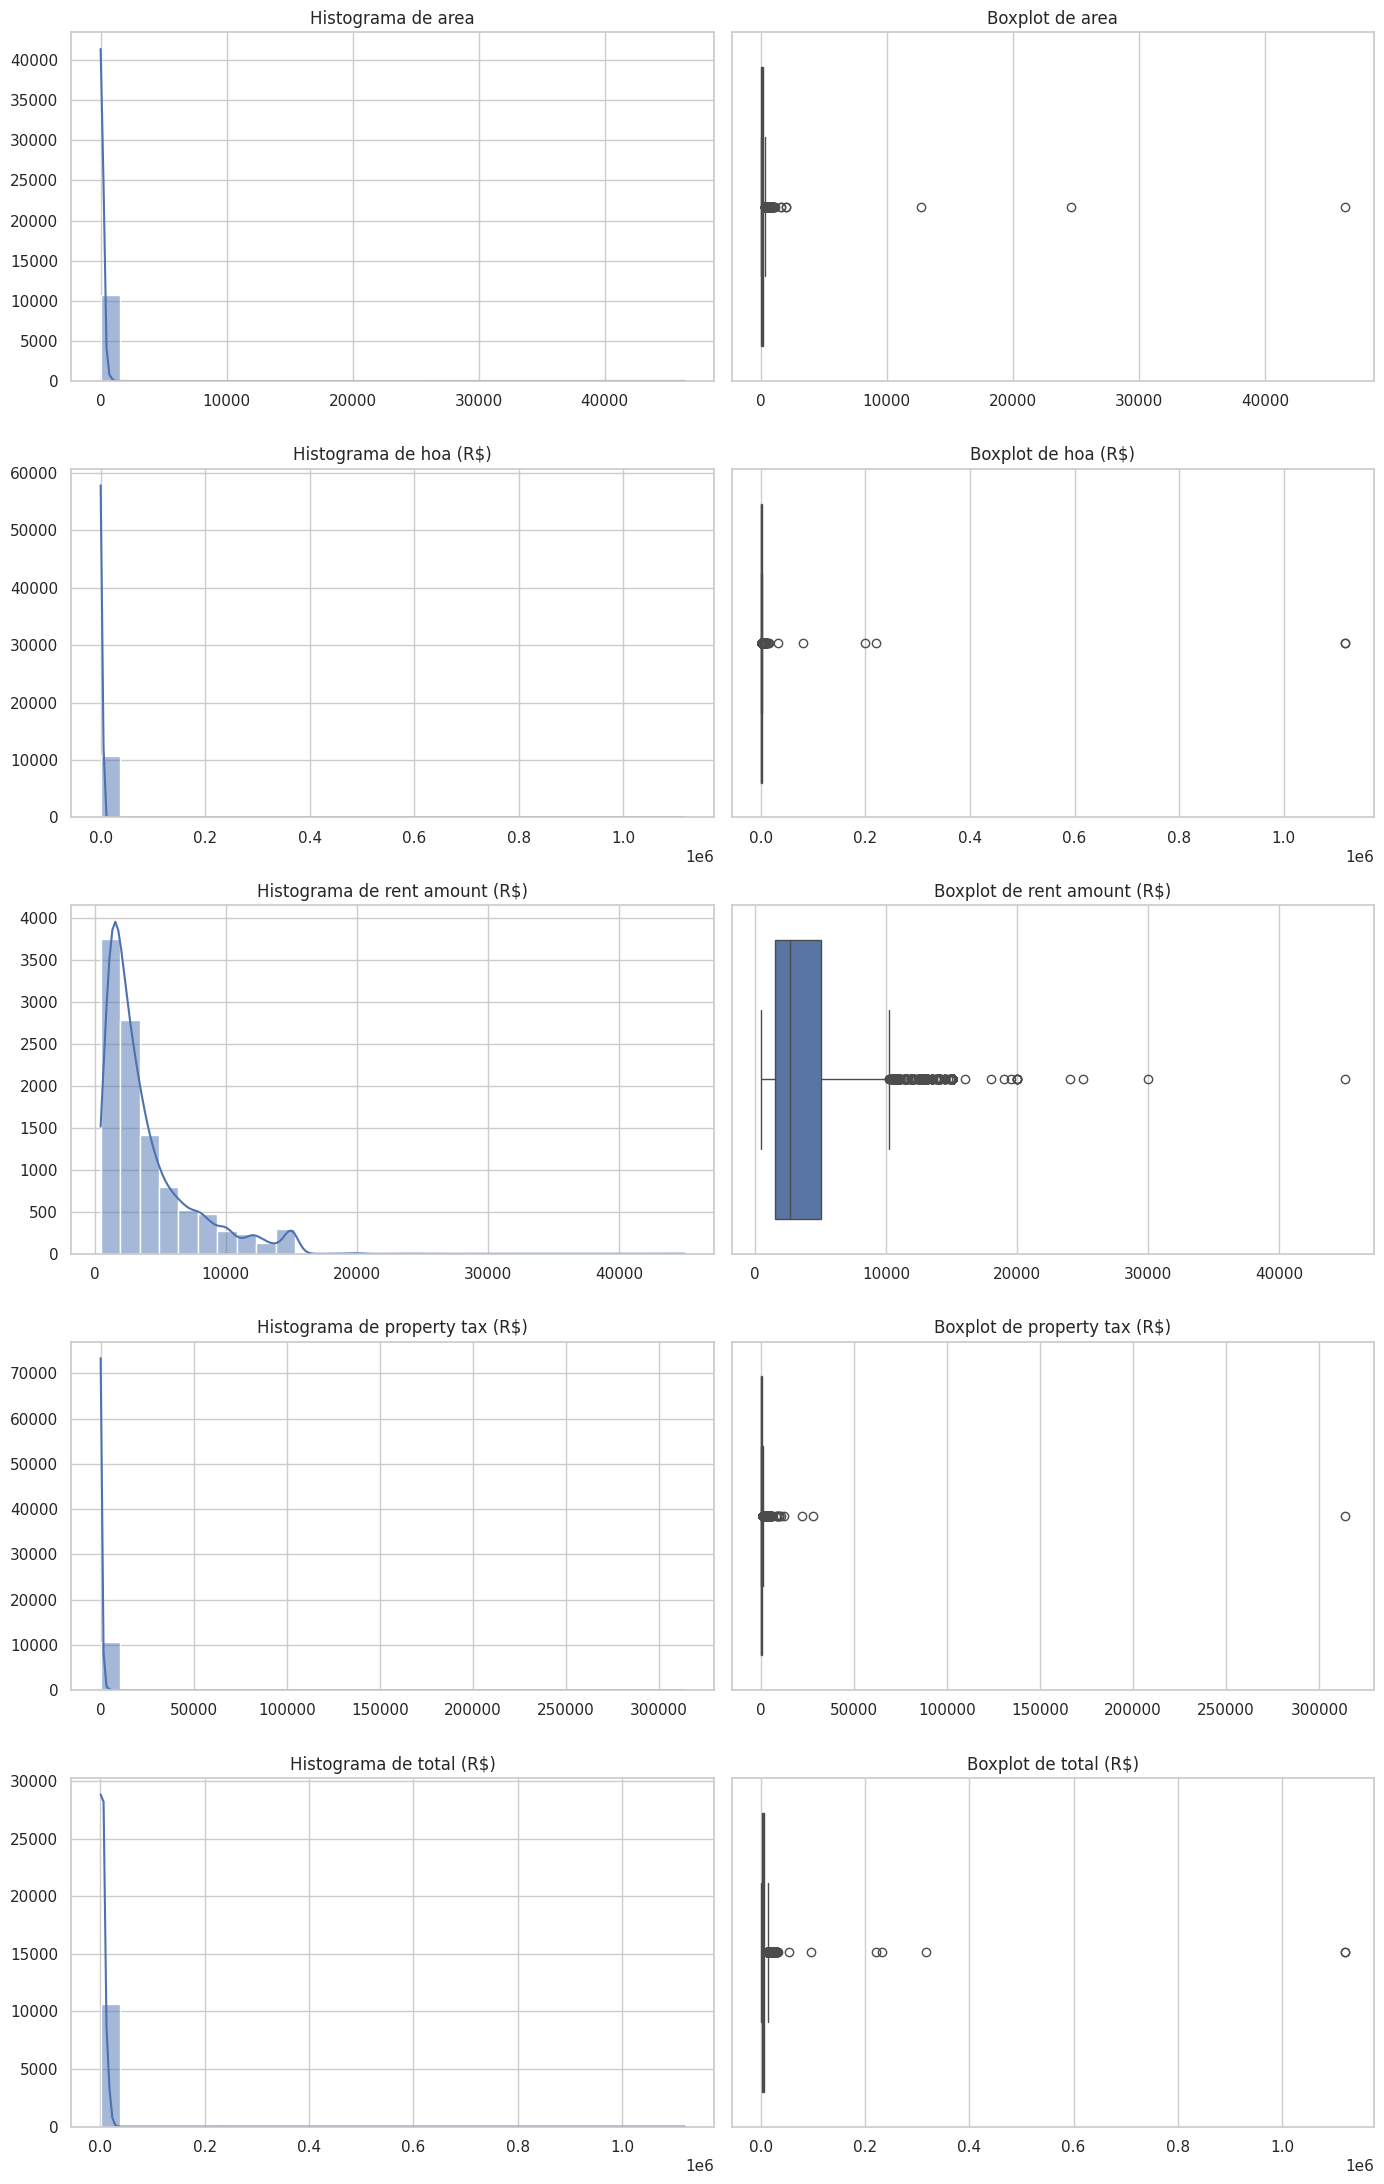

In [ ]:
# Definindo o layout dos gráficos
fig, axs = plt.subplots(5, 2, figsize=(14, 22))

# Histogramas
for i, column in enumerate(columns_to_check):
    sns.histplot(imoveis[column], bins=30, ax=axs[i, 0], kde=True)
    axs[i, 0].set_title(f'Histograma de {column}')
    axs[i, 0].set_xlabel('')
    axs[i, 0].set_ylabel('')

# Boxplots
for i, column in enumerate(columns_to_check):
    sns.boxplot(x=imoveis[column], ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot de {column}')
    axs[i, 1].set_xlabel('')
    axs[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Aplicar transformação logarítmica com um ajuste para evitar log(0)
# Adiciona 1 para garantir que o log(0) não seja um problema
columns_to_transform = ['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'total (R$)']
for column in columns_to_transform:
    imoveis[f'{column}_log'] = np.log(imoveis[column] + 1)

# Tratamento da coluna "floor"
# Substituir '-' por '0' e converter para numérico. Qualquer string não numérica será tratada como NaN e depois convertida para 0.
imoveis['floor'] = pd.to_numeric(imoveis['floor'].replace('-', '0'), errors='coerce').fillna(0).astype(int)

# Verificar os resultados das transformações
imoveis[['floor'] + [f'{col}_log' for col in columns_to_transform]].head()

,floor,area_log,hoa (R$)_log,rent amount (R$)_log,property tax (R$)_log,total (R$)_log
0,7,4.262680,7.633370,8.101981,5.356586,8.633909
1,20,5.771441,7.090910,8.509363,7.467942,8.983942
2,6,4.394449,6.908755,7.937732,0.000000,8.253748
3,2,3.951244,5.602119,7.014814,3.135494,7.259820
4,1,3.258097,0.000000,6.685861,3.258097,6.729824


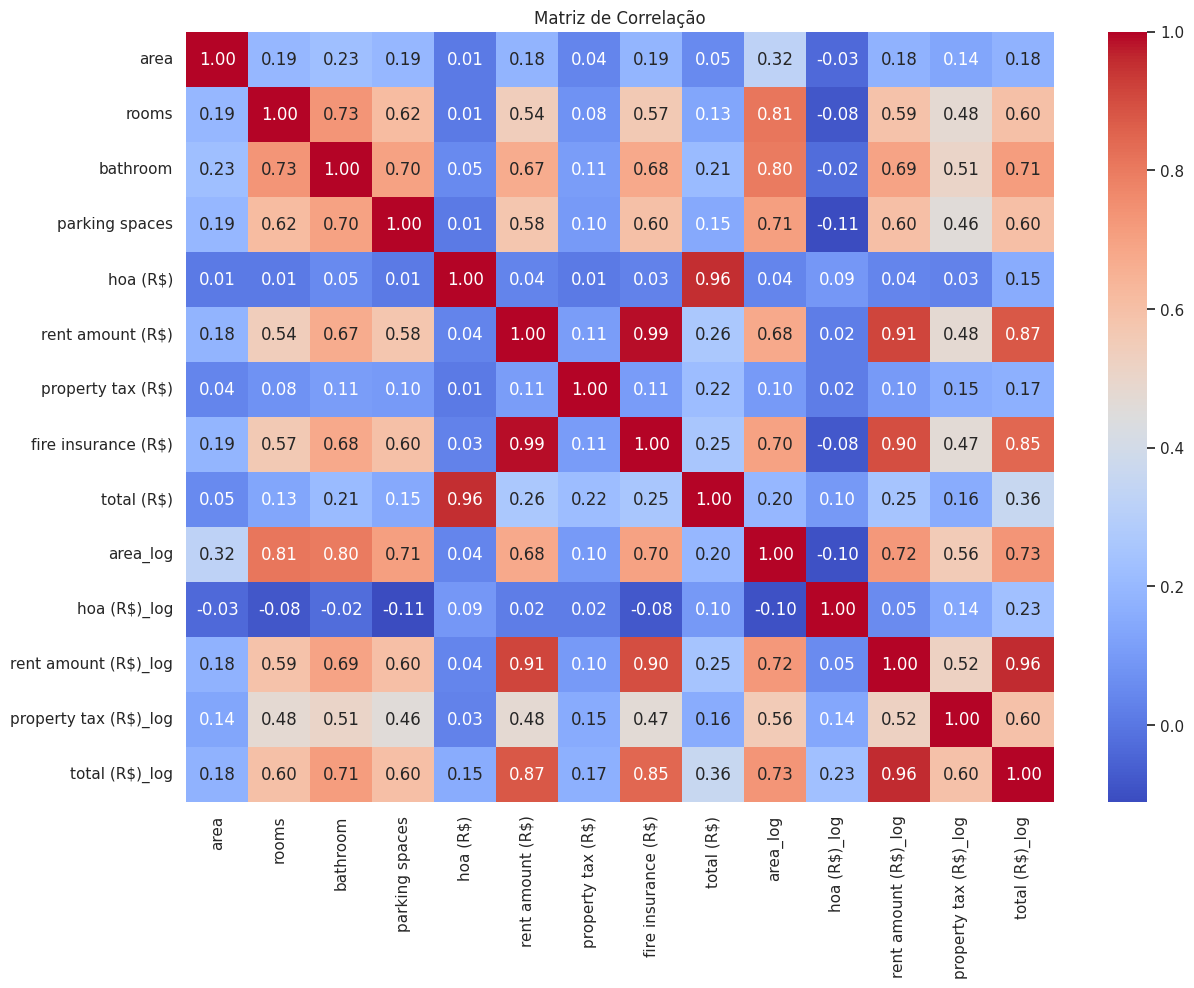

In [ ]:
# Calcular a matriz de correlação para as variáveis numéricas originais e as transformadas
correlation_matrix = imoveis[['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)', 'area_log', 'hoa (R$)_log', 'rent amount (R$)_log', 'property tax (R$)_log', 'total (R$)_log']].corr()

# Visualização da matriz de correlação com Seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

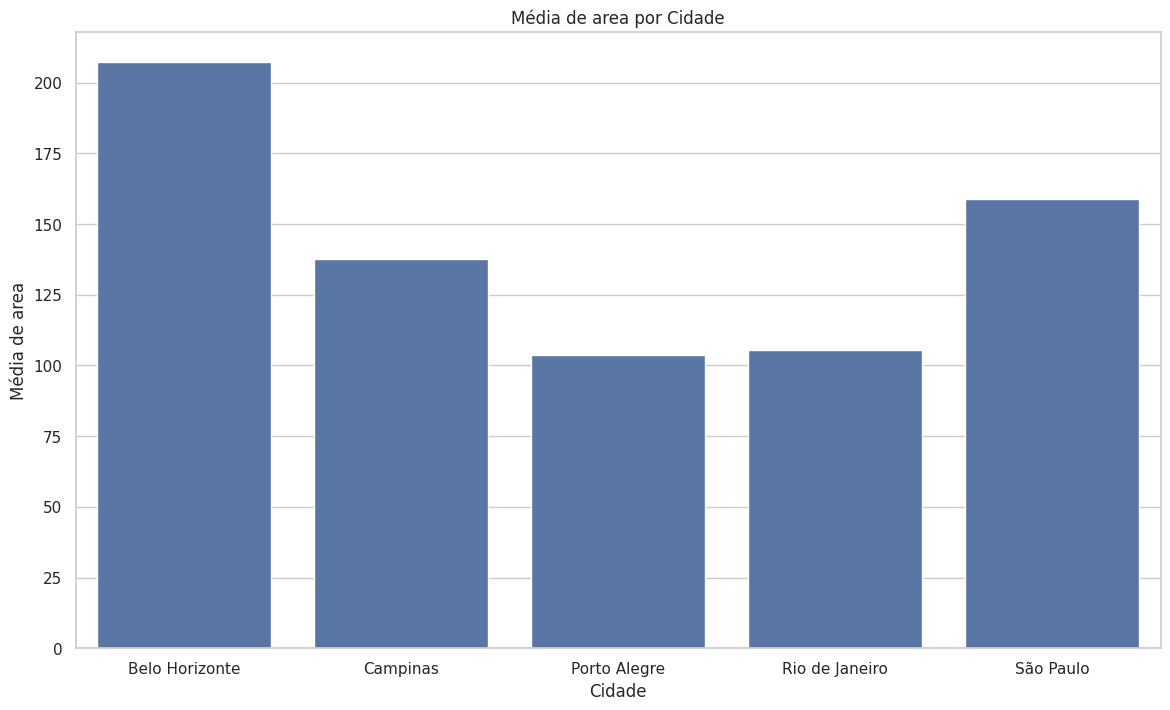

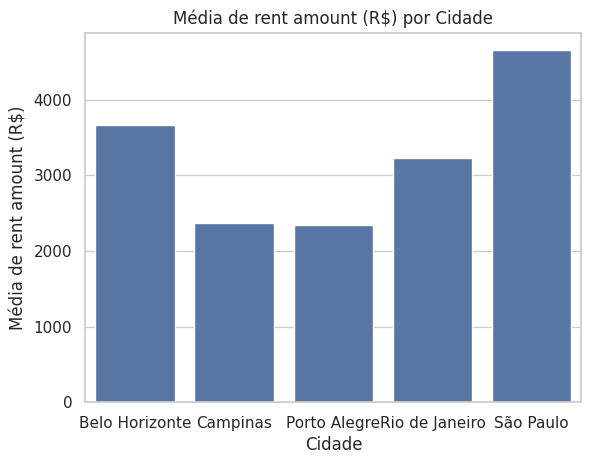

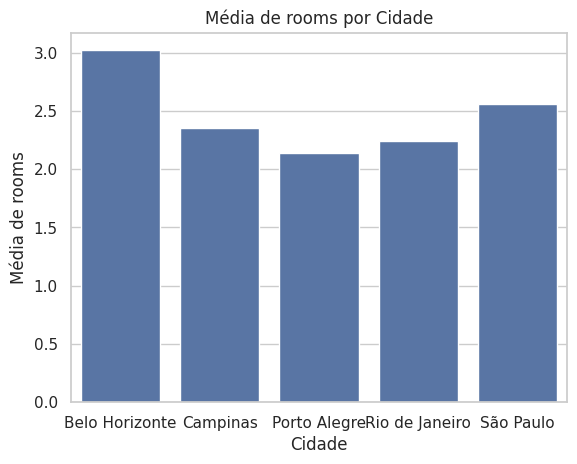

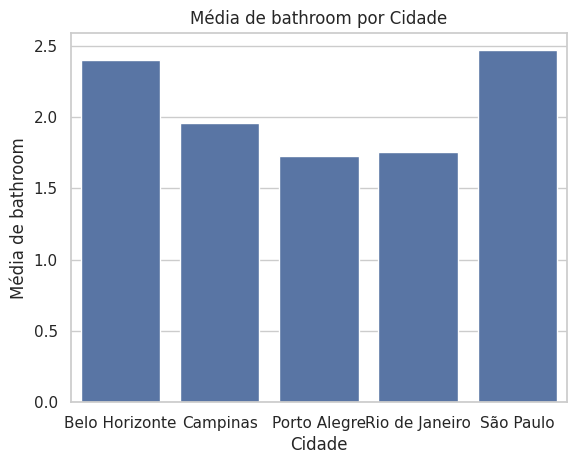

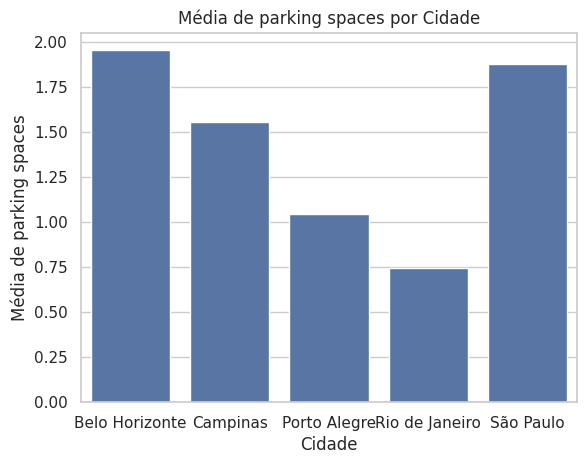

In [ ]:
# Comparação de características dos imóveis entre cidades
# Selecionando algumas variáveis de interesse
features_to_compare = ['area', 'rent amount (R$)', 'rooms', 'bathroom', 'parking spaces']

# Agrupando os dados por cidade e calculando a média para as variáveis selecionadas
city_comparison = imoveis.groupby('city')[features_to_compare].mean().reset_index()

# Visualização dos resultados
plt.figure(figsize=(14, 8))
for feature in features_to_compare:
    sns.barplot(x='city', y=feature, data=city_comparison)
    plt.title(f'Média de {feature} por Cidade')
    plt.ylabel(f'Média de {feature}')
    plt.xlabel('Cidade')
    plt.show()

In [ ]:
# Preparando os dados para a modelagem
# Utilizaremos as colunas transformadas em log e outras variáveis numéricas relevantes como preditores
X = imoveis[['area_log', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)_log', 'property tax (R$)_log', 'fire insurance (R$)', 'floor']]
y = imoveis['rent amount (R$)']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construindo o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Predições no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(160675.4557839174, 0.9854547201886888)

In [ ]:
# Selecionando variáveis para o clustering
features_for_clustering = ['area_log', 'rooms', 'bathroom', 'parking spaces', 'rent amount (R$)_log']
X_clustering = imoveis[features_for_clustering]

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Aplicação inicial do K-Means com um número arbitrário de clusters para iniciar a análise
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Avaliando o agrupamento inicial com o score de silhueta
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

silhouette_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2424024206975933

In [ ]:
# Aplicação do K-Means com um número fixo de clusters (5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Adicionando a informação do cluster aos dados originais
imoveis['cluster'] = kmeans.labels_

# Análise das características médias por cluster
cluster_characteristics = imoveis.groupby('cluster')[features_for_clustering].mean().reset_index()

cluster_characteristics

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,area_log,rooms,bathroom,parking spaces,rent amount (R$)_log
0,0,4.811109,2.766553,2.241392,1.529323,8.176462
1,1,3.695455,1.008879,1.048203,0.425370,7.371276
2,2,5.988386,4.371734,5.073634,5.168646,9.048537
3,3,5.464939,3.563962,3.670981,2.775510,8.742347
4,4,4.257963,2.208260,1.364631,0.786798,7.330615
